![LOgo](logo2h.png) ![LOgo](logoMA.png)

# $$Facultad\ de\ Ingeniería\ y\ Arquitectura\ \\ Análisis\ Numérico\ -\ Notas\ de\ Clase$$

In [1]:
from matplotlib import pylab as pl 
from matplotlib import pyplot as plt
import numpy as np
import math as mt
from scipy.optimize import fsolve


##  Repaso de cálculo


## Límites

### Definición:
Sea una función $f$ definida en un conjunto $\Omega$ tiene límite $L$ en $x_0$  

$$\lim_{x \to x_0} f(x)= L$$

Dado cualquier número real $\epsilon >0$, existe un número real $\delta >0$ tal que 

$$\lvert f(x)-L \rvert < \epsilon,\ siempre\ que\ x \in \Omega\ y\ 0< \lvert x-x_0 \rvert < \delta$$



### Ejemplo:

Si $f(x)= sin(x)$ y nos damos un $\epsilon = 10^{-5}$, como debería ser el tamaño del $\delta$

In [2]:
f = lambda x: np.sin(x)

epsilon = 10**(-5)

print(30*'--')
print('El tamaño del épsilon es =', epsilon )

x0 = 0.0
x = 10**(-3)

print('|f(x)-L| = ',abs(f(x)-f(x0)))
print(abs(f(x)-f(x0)),'<',epsilon,'?' )
print(abs(f(x)-f(x0)) < epsilon)
print(30*'--')

------------------------------------------------------------
El tamaño del épsilon es = 1e-05
|f(x)-L| =  0.0009999998333333417
0.0009999998333333417 < 1e-05 ?
False
------------------------------------------------------------


### Ejemplo:

Si $g(x)= cos(x)$ y nos damos un $\epsilon = 10^{-5}$, como debería ser el tamaño del $\delta$

In [16]:
g = lambda x: np.cos(x)

epsilon = 10**(-5)

print(30*'--')
print('El tamaño del épsilon es =', epsilon )

x0 = 0.0
x = 10**(-3)

print('|g(x)-L| = ',abs(g(x)-g(x0)))
print('|x-xo| = ',abs(x-x0))
print(abs(g(x)-g(x0)),'<',epsilon,'?' )
print(abs(g(x)-g(x0)) < epsilon)
print(30*'--')

------------------------------------------------------------
El tamaño del épsilon es = 1e-05
|g(x)-L| =  4.999999583255033e-07
|x-xo| =  0.001
4.999999583255033e-07 < 1e-05 ?
True
------------------------------------------------------------


### Ejemplo:

Si $\displaystyle h(x)= x^2$ y nos damos un $\displaystyle \epsilon = 10^{-7}$, como debería ser el tamaño del $\displaystyle \delta$

In [145]:
h = lambda x: x**2

epsilon = 10**(-7)
print(30*'--')
print('El tamaño del épsilon es =', epsilon )

x0 = 0.0
x = 10**(-3)

print('|h(x)-L| = ',abs(h(x)-h(x0)))
print(abs(h(x)-h(x0)),'<',epsilon,'?' )
print(abs(h(x)-h(x0)) < epsilon)
print(30*'--')

------------------------------------------------------------
El tamaño del épsilon es = 1e-07
|h(x)-L| =  1e-06
1e-06 < 1e-07 ?
False
------------------------------------------------------------


## Continuidad

### Definición:

Sea una función $f$ definida en un conjunto $\Omega$ de números reales y $x_0 \in \Omega$. Entonces $f$ es $continua$ en $x_0$ si

$$\lim_{x \to x_0} f(x)=f(x_0)$$

Al conjunto de todos las funciones continuas en el conjunto $\Omega$ se denota por $C(\Omega)$ ($C([a,b])$ o $C(a,b]$ si $\Omega$ es un intervalo).

### Ejemplo:

Dada la función $ \displaystyle f(x)= |x|$ la cual es continua en todo su dominio, pero las siguientes función no lo es


\begin{equation}
     \label{eq:aqui-le-mostramos-como-hacerle-la-llave-grande}
     g(x) = \left\{
	       \begin{array}{ll}
		 -1, & \mathrm{si\ } x <0 \\
		  1, & \mathrm{si\ } x \geq 0
	       \end{array}
	     \right.
   \end{equation}

y $$h(x) = \frac{1}{x}$$



Text(0.5, 1.0, 'h(x) = 1/x^2')

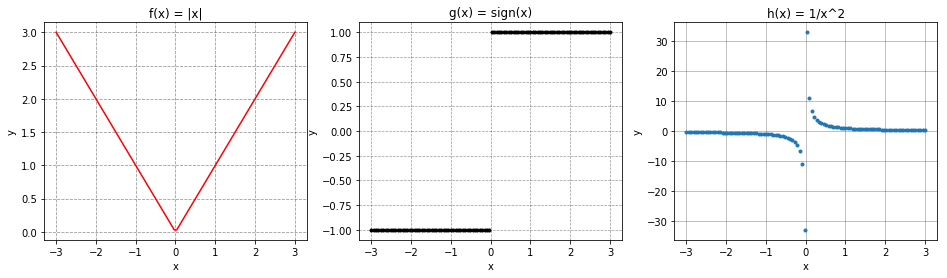

In [7]:
x = np.linspace(-3,3,100)

# Definiendo las funciones f,g,h
f,g,h = np.abs(x), np.sign(x),1/x

# Importando los módulos
%matplotlib inline 
# Declarando axis containers las cuales guardará las figuras 
fig, ax = plt.subplots(1,3, figsize=(16,4))

# Graficando las tres funciones
#for ax in axes
ax[0].plot(x,f,'r')
ax[0].grid(color='k',alpha = 0.4, linestyle= 'dashed', linewidth = 0.8)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('f(x) = |x|')

ax[1].plot(x,g,'k.')
ax[1].grid(color='k',alpha = 0.4, linestyle= 'dashed', linewidth = 0.7)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('g(x) = sign(x)')

ax[2].plot(x,h,'.')
ax[2].grid(color='k',alpha = 0.4, linewidth = 0.6)
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
ax[2].set_title('h(x) = 1/x^2')



### Definición:

Sea $\displaystyle \{ x_n\}^\infty _{n=1}$ una sucesión infinita de números reales. La sucesión tiene $\textit{límite}$ $x$ $\textit{converge}$ a $x$ si para cualquier $\epsilon >0$ existe un entero positivo $N(\epsilon)$ tal que $|x_n -x|< \epsilon$ siempre que $n \geq N(\epsilon)$. En este caso, escribimos 

$$\lim_{n \to \infty} x_n=x,\hspace{1.0cm}\ o\ \hspace{1.0cm} x_n\to x\ cuando\ n \to \infty.  $$

$$$$

### Teorema 
Sea $\displaystyle f$ definida en un conjunto $\displaystyle \Omega$ de números reales y $x \in \Omega$, entonces los siguentes enunciados son _equivalentes_ 

1. $f$ es continua en $x$
2. $\displaystyle \{ x_n\}^\infty _{n=1}$ es cualquier sucesion que converge a $x$ entonces el $$\lim_{n \to \infty} f(x_n)= f(x)$$.


### Ejemplo:

Dada la función 

$$
     \label{eq:aqui-le-mostramos-como-hacerle-la-llave-grande}
     f(x) = \left\{
	       \begin{array}{ll}
		 cos(\pi/x), & \mathrm{si\ } x \neq 0 \\
		  1, & \mathrm{si\ } x = 0
	       \end{array}
	     \right.
$$

no es continua en $\displaystyle x=0$. Para mostrar esto, sea $\displaystyle x_n =1/n$. 

Si $\displaystyle f$ es continua en $\displaystyle \lim_{n \to \infty} f(1/n)= 1$.

Text(0, 0.5, 'f(1/n)')

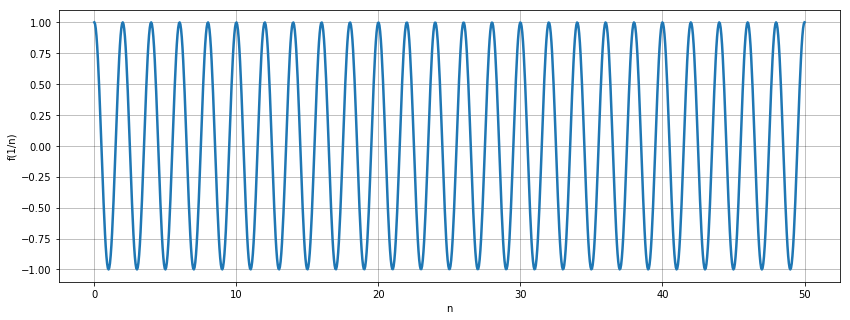

In [2]:
n = np.linspace(0.001,50,1000)
f = lambda x: np.cos(np.pi/x)
fig, ax = plt.subplots(1, figsize = (14,5))
ax.plot(n, f(1/n), linewidth = 2.5, linestyle ="-")
ax.grid(color ='k',alpha = 0.4, linewidth = 0.6)
ax.set_xlabel('n')
ax.set_ylabel('f(1/n)') 

### Ejemplo:

Dada la función 

$$   
\label{eq: 1}
     f(x) = \left\{
	       \begin{array}{ll}
		 xcos(\pi/x), & \mathrm{si\ } x \neq 0 \\
		  1, & \mathrm{si\ } x = 0
	       \end{array}
	     \right.
$$

no es continua en $\displaystyle x=0$. Para mostrar esto, sea $\displaystyle x_n =1/n$. 

Si $\displaystyle f$ es continua en $\displaystyle \lim_{n \to \infty} f(1/n)= 1$.

Text(0,0.5,'f(1/n)')

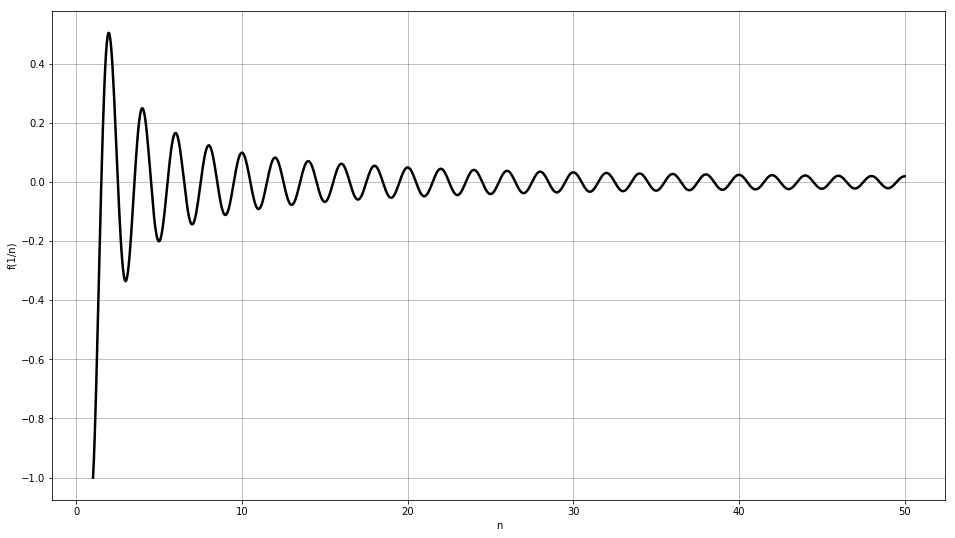

In [9]:
n=np.linspace(1,50,1000)

f =lambda x: x*np.cos(np.pi/x)

fig, ax = plt.subplots(1, figsize=(16,9))
ax.plot(n, f(1/n), color ='k', linewidth = 2.5, linestyle = "-")
ax.grid(color ='k',alpha = 0.4, linewidth = 0.6)
ax.set_xlabel('n')
ax.set_ylabel('f(1/n)') 

### Teorema ( Teorema del Valor Intermedio)
Sea $\displaystyle f \in C[a,b]$. Asumamos que $\displaystyle f(a) \neq f(b)$. Para cada número real $y$, $\displaystyle f(a) <y< f(b)$, existe $\displaystyle c \in [a,b]$, tal que $\displaystyle f(c)=y$.


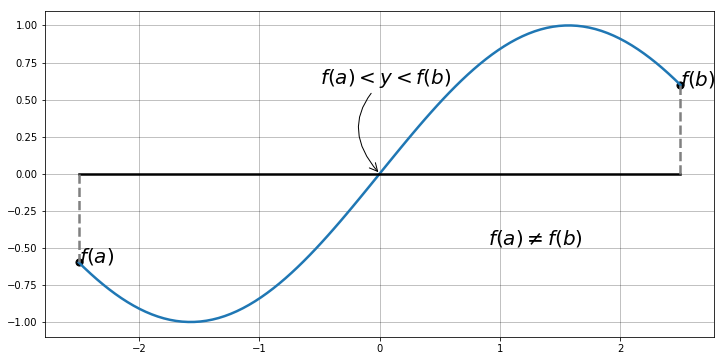

In [364]:
# comando anotate()
x = np.linspace(-2.5,2.5,100)

# Otra manera de declarar funciones para evaluarlas
f = lambda x: np.sin(x) # forma 1 inline
c = 0*x + 0           # forma 2

fig, ax = plt.subplots(figsize = (12,6))
ax.plot(x, f(x), linewidth = 2.5, linestyle = "-")
ax.plot(x, c, color ='k',linewidth = 2.5)


fa_thm = pl.text(-2.5, f(-2.5), r'$f(a)$',color ='k' ,fontsize=20)
fb_thm = pl.text(2.5, f(2.5), r'$f(b)$',color ='k' ,fontsize=20)

# Haciendo anotaciones usando pylab
# ubico los puntos al final de los endpoints
pl.scatter([2.5, ], [f(2.5), ], 50, color='black')
pl.scatter([-2.5, ], [f(-2.5), ], 50, color='black')



pl.annotate(r'$ f(a) <y< f(b)$',
            xy=(0, 0), xycoords='data',
            xytext=(-60, 90), textcoords='offset points', fontsize=20,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.5"))

fb_thm = pl.text(0.9, f(-0.5), r'$f(a) \neq f(b)$',color ='k' ,fontsize=20)

pl.plot([2.5,2.5], [f(0),f(2.5)], color='gray', linewidth=2.5, linestyle="--")
pl.plot([-2.5,-2.5], [f(0),f(-2.5)], color='gray', linewidth=2.5, linestyle="--")
ax.grid(color ='k',alpha = 0.4, linewidth = 0.6)


# texto para componentes
# pl.plot([0,2.5], [f(0),f(2.5)], color='red', linewidth=2.5, linestyle="--")
# pl.annotate(r'$||a||$',
#            xy=(1, 0.25), xycoords='data',
#            xytext=(30, 30), textcoords='offset points', fontsize=20,
#            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.5"))

## Diferenciabilidad

### Definición:
Sea $f$ una función definida en un intervalo abierto $\Omega$ el cual contiene $x_0$. la función $f$ es _diferenciable_ en $x_0$ si

$$ f'(x_0) = \lim_{x \to x_0} \frac{f(x)-f(x_0)}{x-x_0} $$

In [141]:
x0=0
x1=0.1
print(30*'--')
print('\nLa derivada en el punto x=0 , con un tamaño de paso de \n\nh=',x1,'es \n\nf(x0)=',(f(x1)-f(x0))/(x1-x0))
print('\n y el error al calcular la derivada es \n \n|f(x0)-f(exacto)|=',(f(x1)-f(x0))/(x1-x0)-np.cos(x0))
print('\n',30*'--')

------------------------------------------------------------

La derivada en el punto x=0 , con un tamaño de paso de 

h= 0.1 es 

f(x0)= 0.9983341664682815

 y el error al calcular la derivada es 
 
|f(x0)-f(exacto)|= -0.0016658335317184525

 ------------------------------------------------------------


#### _Algunos de los teoremas más importantes de análisis a utilizar en el curso de Análisis Numérico_

### Teorema

Si una función  $ \displaystyle f$ es diferenciable en $\displaystyle x_0$, entonces $ \displaystyle f$ es continua en $\displaystyle x_0$.


### Teorema (Teorema de Rolle)

Supongamos que $\displaystyle f \in C[a,b]$ y que $ \displaystyle f$ es derivable en $ \displaystyle (a,b)$. Si $\displaystyle f(a)=f(b)$, entonces existe un número $\displaystyle c $ en  $\displaystyle (a,b)$ tal que $\displaystyle f'(c)=0$. 

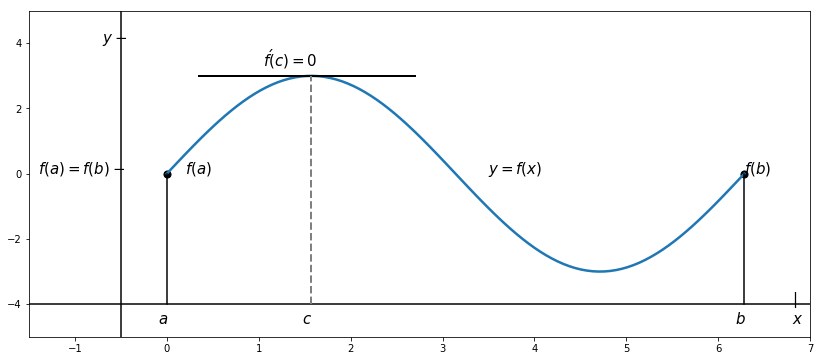

In [373]:
x = np.linspace(0,2*np.pi,100)
y = np.linspace(0.35,2.7,100)

# Otra manera de declarar funciones para evaluarlas
f = lambda x: 3*np.sin(x) # forma 1 inline
c = 0*y + 3.01           # forma 2

# Dibujando las graficas

fig, ax = plt.subplots(figsize = (14,6))
ax.plot(x, f(x), linewidth = 2.5, linestyle = "-")
ax.plot(y, c, color ='k',linewidth = 2)

# Dibujar los ejes
ax.axvline(-0.5, color='k', ls="-")
ax.axhline(-4, color='k', ls="-")

# limites de el box
ax.set_xlim(-1.5, 7)
ax.set_ylim(-5, 5)

# Haciendo anotaciones usando pylab para ubicar los puntos al final de los endpoints
pl.scatter([0, ], [f(0), ], 50, color='black')
pl.scatter([2*np.pi, ], [f(2*np.pi), ], 50, color='black')

pl.text(0.2, f(0), r'$f(a)$',color ='k' ,fontsize=15)
pl.text(2*np.pi, f(2*np.pi), r'$f(b)$',color ='k' ,fontsize=15)
pl.text(-1.4, f(0), r'$f(a)=f(b)-$',color ='k' ,fontsize=15)
pl.text(np.pi/3, f(np.pi/2)+0.3, r'$f \'(c)=0$',color ='k' ,fontsize=15)
pl.text(-0.7, 4, r'$y-$',color ='k' ,fontsize=15)
pl.text(6.8, -4, r'$|$',color ='k' ,fontsize=15)
pl.text(6.8, -4.6, r'$x$',color ='k' ,fontsize=15)
pl.text(-0.1, -4.6, r'$a$',color ='k' ,fontsize=15)
pl.text(np.pi/2-0.1, -4.6, r'$c$',color ='k' ,fontsize=15)
pl.text(2*np.pi-0.1, -4.6, r'$b$',color ='k' ,fontsize=15)
pl.text(3.5, 0, r'$y=f(x)$',color ='k' ,fontsize=15)

pl.plot([np.pi/2,np.pi/2], [-4,f(np.pi/2)], color='gray', linewidth=2, linestyle="--")
pl.plot([0,0], [-4,f(0)], color='black', linewidth=1.5)
pl.plot([2*np.pi,2*np.pi], [-4,f(0)], color='black', linewidth=1.5)

### Teorema (Teorema del valor medio)

Supongamos que $\displaystyle f \in C[a,b]$ y que $ \displaystyle f$ es derivable en $ \displaystyle (a,b)$, entonces  existe un número $\displaystyle c $ en  $\displaystyle (a,b)$ tal que \\ \medskip

$$ f'(c) =  \frac{f(b)-f(a)}{b-a} .$$

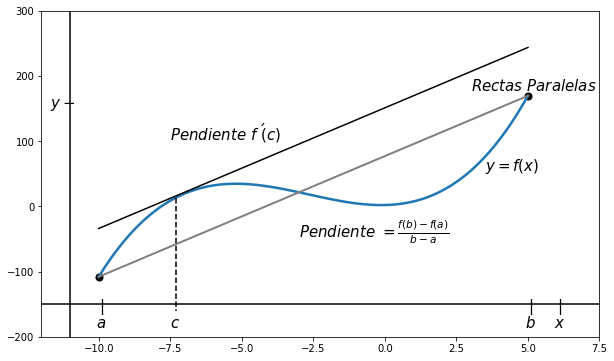

In [64]:
x = np.linspace(-10,5,100)
f = lambda x: (1/2)*(x)**3+4*(x)**2+(x)+2 # forma 1 inline
h = (f(5)-f(-10))/(5+10)*x +151

# Dibujando las graficas
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(x, f(x), linewidth = 2.5, linestyle = "-")
ax.plot(x, h, linewidth = 1.5, linestyle = "-", color='black')

# Dibujar los ejes
ax.axvline(-11, color='k', ls="-")
ax.axhline(-150, color='k', ls="-")

# limites de el box
ax.set_xlim(-12, 7.5)
ax.set_ylim(-200, 300)

# Haciendo anotaciones usando pylab para ubicar los puntos al final de los endpoints
pl.scatter([-10, ], [f(-10), ], 50, color='black')
pl.scatter([5, ], [f(5), ], 50, color='black')

pl.text(-7.5, f(4), r'$Pendiente\ f\ \'(c)$',color ='k' ,fontsize=15)
pl.text(3, f(5.1), r'$Rectas\ Paralelas$',color ='k' ,fontsize=15)
pl.text(-3, f(-9), r'$Pendiente\ = \frac{f(b)-f(a)}{b-a}$',color ='k' ,fontsize=15)
pl.text(3.5, f(3), r'$y = f(x)$',color ='k' ,fontsize=15)

pl.text(-10.1, -186, r'$a$',color ='k' ,fontsize=15); pl.text(-10, -160, r'$|$',color ='k' ,fontsize=15)
pl.text(4.9, -186, r'$b$',color ='k' ,fontsize=15)
pl.text(5, -160, r'$|$',color ='k' ,fontsize=15)
pl.text(5.9, -186, r'$x$',color ='k' ,fontsize=15)
pl.text(6, -160, r'$|$',color ='k' ,fontsize=15)
pl.text(-7.5, -186, r'$c$',color ='k' ,fontsize=15)
pl.text(-11.7, 151, r'$y -$',color ='k' ,fontsize=15)

pl.plot([-10,5], [f(-10),f(5)], color='gray', linewidth=2, linestyle="-")
pl.plot([-7.3,-7.3], [f(-7.3),-160], color='black', linewidth=1.5,linestyle="--")

### Teorema (Teorema de los valores extremos)

Si $\displaystyle f \in C[a,b]$, entonces existen $ \displaystyle c_1, c_2 \in [a,b]$ tales que $ \displaystyle f(c_1) \leq f(x) \leq f(c_2)$, para toda $\displaystyle x \in [a,b]$. Además, si $\displaystyle f$ es derivable en $\displaystyle (a,b)$, entonces los números $\displaystyle c_1$ y $\displaystyle c_2$ son extremos de $\displaystyle [a,b]$,(pueden ser _a_ o _b_), o bien donde se anula $\displaystyle f' (x)$.

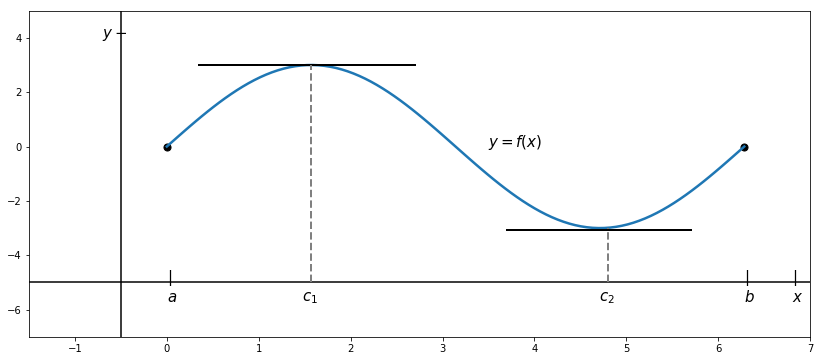

In [3]:
x = np.linspace(0,2*np.pi,100)
y = np.linspace(0.35,2.7,100)
z = np.linspace(3.7,5.7,100)

# Otra manera de declarar funciones para evaluarlas
f = lambda x: 3*np.sin(x) # forma 1 inline
c1 = 0*y + 3.01           # forma 2
c2 = 0*y - 3.08

# Dibujando las graficas
fig, ax = plt.subplots(figsize = (14,6))
ax.plot(x, f(x), linewidth = 2.5, linestyle = "-")
ax.plot(y, c1, color ='k',linewidth = 2)
ax.plot(z, c2, color ='k',linewidth = 2)

# Dibujar los ejes
ax.axvline(-0.5, color='k', ls="-")
ax.axhline(-5, color='k', ls="-")

# limites de el box
ax.set_xlim(-1.5, 7)
ax.set_ylim(-7, 5)

# Haciendo anotaciones usando pylab para ubicar los puntos al final de los endpoints
pl.scatter([0, ], [f(0), ], 50, color='black')
pl.scatter([2*np.pi, ], [f(2*np.pi), ], 50, color='black')

pl.text(-0.7, 4, r'$y-$',color ='k' ,fontsize=15)
pl.text(6.8, -5.7, r'$x$',color ='k' ,fontsize=15)
pl.text(6.8, -5, r'$|$',color ='k' ,fontsize=15)
pl.text(0, -5.7, r'$a$',color ='k' ,fontsize=15)
pl.text(0, -5, r'$|$',color ='k' ,fontsize=15)
pl.text(np.pi/2-0.1, -5.7, r'$c_1$',color ='k' ,fontsize=15)
pl.text(4.7, -5.7, r'$c_2$',color ='k' ,fontsize=15)
pl.text(2*np.pi, -5.7, r'$b$',color ='k' ,fontsize=15)
pl.text(2*np.pi, -5, r'$|$',color ='k' ,fontsize=15)
pl.text(3.5, 0, r'$y=f(x)$',color ='k' ,fontsize=15)

pl.plot([np.pi/2,np.pi/2], [-5,f(np.pi/2)], color='gray', linewidth=2, linestyle="--")
pl.plot([4.8,4.8], [-5,f(4.8)], color='gray', linewidth=2, linestyle="--")

#### Nota:

Este teorema establece que, tanto los valores _máximos_ y _mínimos_ de $\displaystyle f(x)$ en un intervalo cerrado $\displaystyle [a,b]$, se alcanzan dentro del mismo en los puntos $\displaystyle c_1, c_2$.

### Ejemplo

Determinen el $\displaystyle máx_{a \leq x \leq b} |f(x)|$ para $$ f(x)=5 cos(2x)-2x sen(2x)$$ en los intervalos $\displaystyle [1,2]$ y $\displaystyle [0.5, 1]$.

### Solución:



### Teorema ( Teorema de Rolle Generalizado)

Suponga que $\displaystyle f \in C[a,b]$ es n veces diferenciable en $ \displaystyle (a,b)$. Si $\displaystyle f(x)$ se anula en los $n+1$ diferentes $\displaystyle a \leq x_0< x_1<\dots <x_n  \leq b $, entonces existe un número $\displaystyle c $ en  $\displaystyle (x_0,x_n)$(y por lo tanto en $(a,b)$), tal que $\displaystyle f^{(n)}(c)=0$. 

### Ejemplo

Consideremos el polinomio de grado 4, $\displaystyle f(x)=8x^4-8x^2+1$, verificaremos que al menos la función debe de tener un cero:

### Solución:

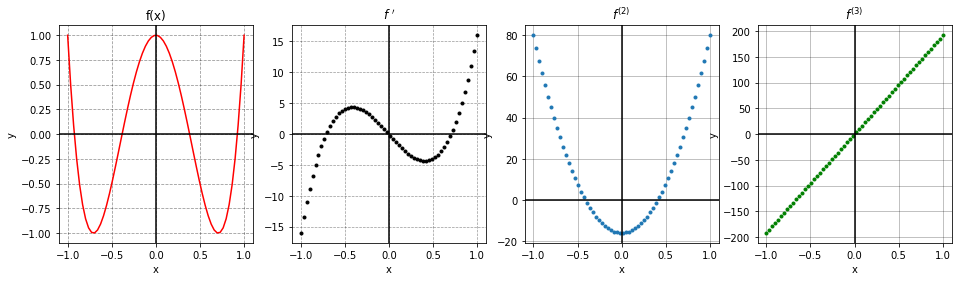

In [19]:
x = np.linspace(-1,1,60)

f = lambda x: 8*x**4 - 8*x**2 + 1 
df = lambda x: 8*4*x**3 - 8*2*x
ddf = lambda x: 8*3*4*x**2 - 8*2
dddf = lambda x: 8*3*4*2*x
ig, ax = plt.subplots(1,4, figsize=(16,4))

# Graficando las tres funciones
#for ax in axes
ax[0].plot(x,f(x),'r')
ax[0].grid(color='k',alpha = 0.4, linestyle= 'dashed', linewidth = 0.8)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('f(x)')
ax[0].axvline(0, color='k', ls="-")
ax[0].axhline(0, color='k', ls="-")


ax[1].plot(x,df(x),'k.')
ax[1].grid(color='k',alpha = 0.4, linestyle= 'dashed', linewidth = 0.7)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('$f\ \'$')
ax[1].axvline(0, color='k', ls="-")
ax[1].axhline(0, color='k', ls="-")

ax[2].plot(x,ddf(x),'.')
ax[2].grid(color='k',alpha = 0.4, linewidth = 0.6)
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
ax[2].set_title('$f^{(2)}$')
ax[2].axvline(0, color='k', ls="-")
ax[2].axhline(0, color='k', ls="-")

ax[3].plot(x,dddf(x),'g.')
ax[3].grid(color='k',alpha = 0.4, linewidth = 0.6)
ax[3].set_xlabel('x')
ax[3].set_ylabel('y')
ax[3].set_title('$f^{(3)}$')
ax[3].axvline(0, color='k', ls="-")
ax[3].axhline(0, color='k', ls="-")


### Ejemplo

Consideremos el polinomio de grado 3, $ \displaystyle f(x)=8x^3-8x$, verificaremos que al menos la función debe de tener un cero:

### Solución:

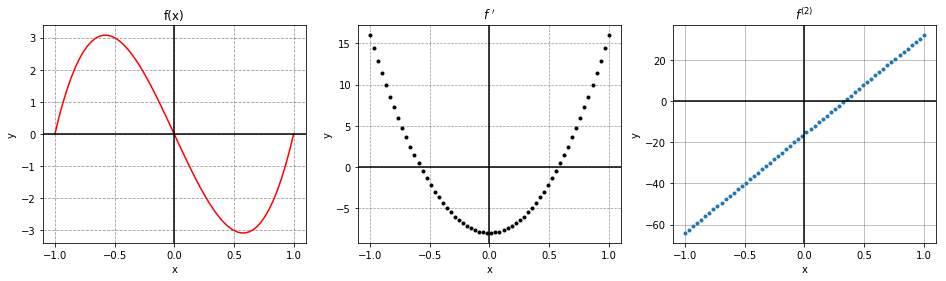

In [20]:
x = np.linspace(-1,1,60)

f = lambda x: 8*x**3 - 8*x 
df = lambda x: 8*3*x**2 - 8
ddf = lambda x: 8*3*2*x - 8*2
ig, ax = plt.subplots(1,3, figsize=(16,4))

# Graficando las tres funciones
#for ax in axes
ax[0].plot(x,f(x),'r')
ax[0].grid(color='k',alpha = 0.4, linestyle= 'dashed', linewidth = 0.8)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('f(x)')
ax[0].axvline(0, color='k', ls="-")
ax[0].axhline(0, color='k', ls="-")


ax[1].plot(x,df(x),'k.')
ax[1].grid(color='k',alpha = 0.4, linestyle= 'dashed', linewidth = 0.7)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('$f\ \'$')
ax[1].axvline(0, color='k', ls="-")
ax[1].axhline(0, color='k', ls="-")

ax[2].plot(x,ddf(x),'.')
ax[2].grid(color='k',alpha = 0.4, linewidth = 0.6)
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
ax[2].set_title('$f^{(2)}$')
ax[2].axvline(0, color='k', ls="-")
ax[2].axhline(0, color='k', ls="-")



## Integración

### Definición:

La integral de $Riemann$ de la función $f$ definida en el intervalo $\displaystyle [a,b]$ si el siguiente límite existe:

$$ \int^a _b f(x)dx = \lim _{max\ \Delta x_i \to 0} \sum ^n _{i=1} f(\bar{x_i}) \Delta x_i, $$

donde los números $\displaystyle x_0, x_1, ...,x_n$ satisface $\displaystyle a \leq x_0 \leq x_1 \leq \dots \leq x_n  \leq b $, $\displaystyle \Delta x_i = x_i-x_{i-1}$ para $ i = 1, 2, \dots , n.$ Con $\bar{x_i}$ un punto arbitrario en el intervalo $\displaystyle [x_{i-1}, x_i].$

Escojamos los puntos $\displaystyle x_i$ igual espaciado: $\displaystyle x_i= a+ i\frac{b-a}{n}$ y $\displaystyle \bar{x_i}=x_i$. Entonces tenemos $\displaystyle \Delta x_i = \frac{b-a}{n}$

$$ \int^a _b f(x)dx = \lim _{n \to \infty } \frac{b-a}{n} \sum ^n _{i=1} f(x_i). $$


2.3739847573844153 

 2.3504023872876028


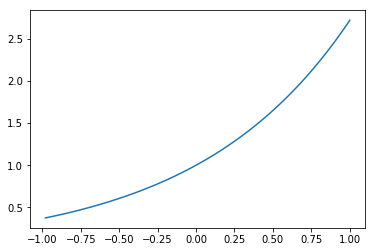

In [10]:
f = lambda x: np.exp(x)
n = 100
a = -1
b = 1
x = np.linspace(a, b, n+1)
x = x[1:]
estimate = ((b-a)/n)*np.sum(f(x))
actual = np.exp(b) - np.exp(a) 
np.abs(estimate-actual)

print(estimate,'\n\n',actual)
plt.plot(x,f(x))


### Teorema (Teorema de Taylor)

Supongamos $\displaystyle f \in C^n [a,b]$, y que $\displaystyle f^{(n+1)} $ existe en $\displaystyle [a,b]$,  $\displaystyle x_0 \in [a,b]$. Para cada $\displaystyle x \in [a,b]$, existe un n\'umero $\displaystyle \xi (x)$ entre $\displaystyle x_o$ y $\displaystyle x$ con

$$ f(x)= P_n(x)+ R_n(x) $$

donde

$$ P_n(x)= f(x_0)+f'(x_0)(x-x_0)+\frac{f''(x_0)}{2!}(x-x_0)^2+...+\frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$$
y

$$R_n(x)=\frac{f^{(n+1)}(\xi(x))}{(n+1)!}(x-x_0)^{n+1}$$

In [ ]:
f = lambda x: np.exp(x)
n = 10
x = np.linspace(a, b, n+1)
x = x[1:] 
x = x - (b-a)/float(2*n) # shift to the midpoint
estimate = (b-a)/n*np.sum(f(x)) 
actual = np.exp(b) - np.exp(a) 
abs(estimate-actual)

In [2]:
def Fact(n):
#----------------------------------------------------------------------------
#  Returns the factorial of n
#----------------------------------------------------------------------------
   f = 1e0
   for i in range(2,n+1): f *= i
   return f
# main
n = int(input("n = "))
k = int(input("k = "))
C = Fact(n)/(Fact(k)*Fact(n-k))
print("C({0:d},{1:d}) = {2:f}".format(n,k,C))

n = 10
k = 3
C(10,3) = 120.000000


In [15]:
def FactRec(n):
#----------------------------------------------------------------------------
#  Returns the factorial of n using recursivity
#----------------------------------------------------------------------------
   return (n * FactRec(n-1) if (n > 1) else 1e0)

In [18]:
print(FactRec(5))
print(FactRec(8))
print(FactRec(6))
print(FactRec(3))
print(FactRec(0))

120.0
40320.0
720.0
6.0
1.0


In [5]:
FactRec(6)

720.0

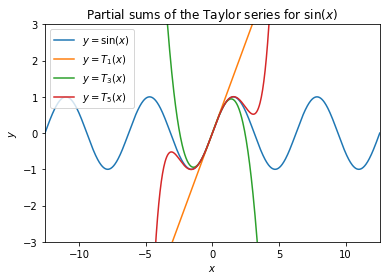

In [2]:
from math import factorial
from pylab import *

x = pi * arange( -400, 401 ) / 100.0
plot( x, sin( x ) )
axis( [x[0], x[-1], -3, 3] )
legend_list = [ '$y = \sin(x)$' ]

y = []
y.append( zeros( len( x ) ) )
for k in range( 3):
    y.append( y[-1] + ((-1)**k) * (x**(2*k+1)) / factorial( 2*k+1 ) )
    plot( x, y[k+1] )
    legend_list.append( '$y = T_{%d}(x)$' % (2*k+1) )

xlabel( '$x$' )
ylabel( '$y$' )
title( 'Partial sums of the Taylor series for $\sin(x)$' )
legend( tuple( legend_list ), loc='upper left' )
show()



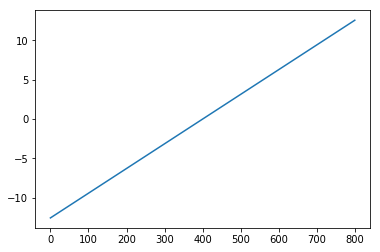

In [6]:
plot(x)

In [1]:
for i in range(5):

SyntaxError: unexpected EOF while parsing (<ipython-input-1-aa82eeb25f1e>, line 1)

In [13]:
suma = 5
for i in range(5):
    suma =  suma+i
    print('i vale = ',i)
    print('Suma vale = ',suma)
promedio=suma/6
print('promedio ',promedio)
print('La regué',promedio)

i vale =  0
Suma vale =  5
i vale =  1
Suma vale =  6
i vale =  2
Suma vale =  8
i vale =  3
Suma vale =  11
i vale =  4
Suma vale =  15
promedio  2.5
La regué 2.5
